In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
import numpy as np

In [2]:
learning_rate=0.045
epochs=1000
device="cpu"
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=3*x+10+0.5*torch.randn(x.size())
loss_record=list()

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc=nn.Linear(1,1)
    def forward(self,x):
        result=self.fc(x)
        return result
model=Net().to(device)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
scheduler=StepLR(optimizer,step_size=50,gamma=0.8)

In [4]:
def train(model,device,data,target,optimizer,epoch):
    model.train()
    data,target=data.to(device),target.to(device)
    result=model(data)
    optimizer.zero_grad()
    train_loss=criterion(result,target)
    train_loss.backward()
    optimizer.step()
    if (epoch+1)%10==0 :
        loss_record.append(train_loss.item())
        print('Train Epoch{}: Loss:{:.6f}'.format(epoch+1,train_loss.item()))
def test(model,device,data,target):
    model.eval()
    data,target=data.to(device),target.to(device)
    result=model(data)
    plt.figure()
    plt.scatter(data,target,color="#ff0000",label="data")
    plt.plot(data,result.detach(),color="#66ccff",label="line")
    plt.legend()
    plt.show()
    print(list(model.named_parameters()))
    plt.figure()
    x_draw=np.arange(1,epochs/10+1,1)
    plt.plot(x_draw,loss_record,color="#ff0000",label="loss")
    plt.legend()
    plt.show()

Train Epoch10: Loss:20.391685
Train Epoch20: Loss:4.214118
Train Epoch30: Loss:1.339675
Train Epoch40: Loss:0.677578
Train Epoch50: Loss:0.455695
Train Epoch60: Loss:0.370063
Train Epoch70: Loss:0.322320
Train Epoch80: Loss:0.293846
Train Epoch90: Loss:0.276638
Train Epoch100: Loss:0.266188
Train Epoch110: Loss:0.260763
Train Epoch120: Loss:0.257222
Train Epoch130: Loss:0.254838
Train Epoch140: Loss:0.253234
Train Epoch150: Loss:0.252153
Train Epoch160: Loss:0.251537
Train Epoch170: Loss:0.251101
Train Epoch180: Loss:0.250783
Train Epoch190: Loss:0.250551
Train Epoch200: Loss:0.250382
Train Epoch210: Loss:0.250278
Train Epoch220: Loss:0.250200
Train Epoch230: Loss:0.250139
Train Epoch240: Loss:0.250092
Train Epoch250: Loss:0.250055
Train Epoch260: Loss:0.250031
Train Epoch270: Loss:0.250012
Train Epoch280: Loss:0.249997
Train Epoch290: Loss:0.249984
Train Epoch300: Loss:0.249974
Train Epoch310: Loss:0.249967
Train Epoch320: Loss:0.249961
Train Epoch330: Loss:0.249956
Train Epoch340: Lo

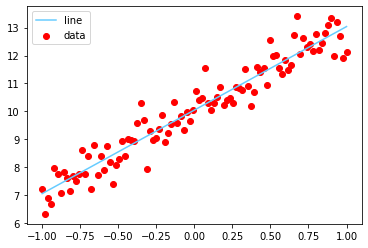

[('fc.weight', Parameter containing:
tensor([[2.9948]], requires_grad=True)), ('fc.bias', Parameter containing:
tensor([10.0429], requires_grad=True))]


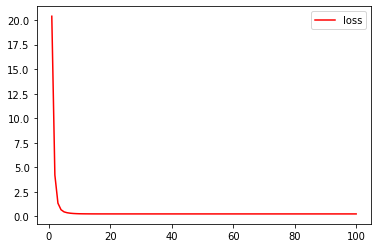

In [5]:
for epoch in range(epochs):
    train(model,device,x,y,optimizer,epoch)
    scheduler.step()
test(model,device,x,y)